In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import RocCurveDisplay 
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold   
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve 

In [ ]:


df0 = pd.read_csv("/content/drive/MyDrive/PRML lab data /Lab 3/titanic (1).csv")
df0=shuffle(df0)
mean_value=df0['Age'].mean()
df0['Age'].fillna(value=mean_value, inplace=True)
df0



,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
628,629,"Bostandyeff, Mr. Guentcho",3,male,26.000000,349224,7.8958,NaN,S,0
581,582,"Thayer, Mrs. John Borland (Marian Longstreth M...",1,female,39.000000,17421,110.8833,C68,C,1
823,824,"Moor, Mrs. (Beila)",3,female,27.000000,392096,12.4750,E121,S,1
767,768,"Mangan, Miss. Mary",3,female,30.500000,364850,7.7500,NaN,Q,0
344,345,"Fox, Mr. Stanley Hubert",2,male,36.000000,229236,13.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
538,539,"Risien, Mr. Samuel Beard",3,male,29.699118,364498,14.5000,NaN,S,0
670,671,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",2,female,40.000000,29750,39.0000,NaN,S,1
484,485,"Bishop, Mr. Dickinson H",1,male,25.000000,11967,91.0792,B49,C,1
813,814,"Andersson, Miss. Ebba Iris Alfrida",3,female,6.000000,347082,31.2750,NaN,S,0


In [ ]:
Lable_en=LabelEncoder()
for i in df0.columns:
  if(df0[i].dtype =='object'):
    df0[i]=Lable_en.fit_transform(df0[i])

df0=shuffle(df0)
print(df0.corr())
df0


             PassengerId      Name    Pclass       Sex       Age    Ticket  \
PassengerId     1.000000 -0.038559 -0.035144  0.042939  0.033207 -0.056554   
Name           -0.038559  1.000000  0.052831  0.020314  0.057466  0.047348   
Pclass         -0.035144  0.052831  1.000000  0.131900 -0.331339  0.319869   
Sex             0.042939  0.020314  0.131900  1.000000  0.084153  0.059372   
Age             0.033207  0.057466 -0.331339  0.084153  1.000000 -0.068848   
Ticket         -0.056554  0.047348  0.319869  0.059372 -0.068848  1.000000   
Fare            0.012658 -0.049173 -0.549500 -0.182333  0.091566 -0.013885   
Cabin          -0.035077  0.061959  0.684121  0.096681 -0.235406  0.243696   
Embarked        0.013083 -0.004557  0.157112  0.104057 -0.022239 -0.006041   
Survived       -0.005007 -0.057343 -0.338481 -0.543351 -0.069809 -0.164549   

                 Fare     Cabin  Embarked  Survived  
PassengerId  0.012658 -0.035077  0.013083 -0.005007  
Name        -0.049173  0.061959 -

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
103,104,405,3,1,33.000000,505,8.6542,147,2,0
683,684,301,3,1,14.000000,566,46.9000,147,2,0
349,350,215,3,1,42.000000,262,8.6625,147,2,0
466,467,132,2,1,29.699118,135,0.0000,147,2,0
799,800,831,3,0,30.000000,307,24.1500,147,2,0
...,...,...,...,...,...,...,...,...,...,...
348,349,183,3,1,3.000000,562,15.9000,147,2,1
640,641,397,3,1,20.000000,409,7.8542,147,2,0
735,736,869,3,1,28.500000,495,16.1000,147,2,0
26,27,240,3,1,29.699118,179,7.2250,147,0,0


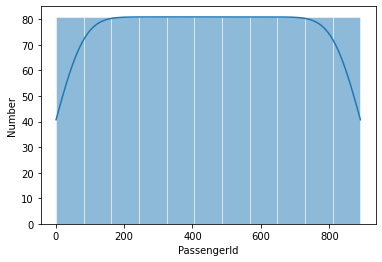

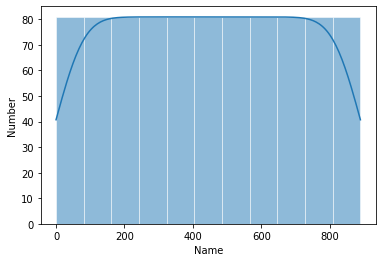

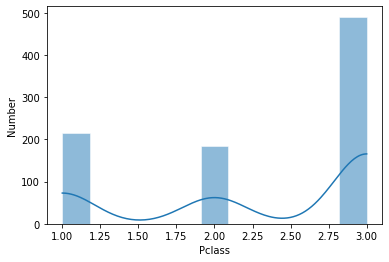

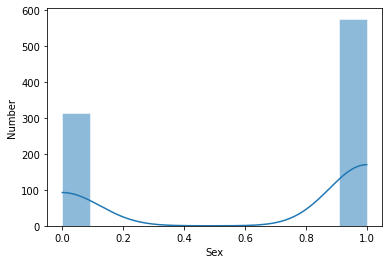

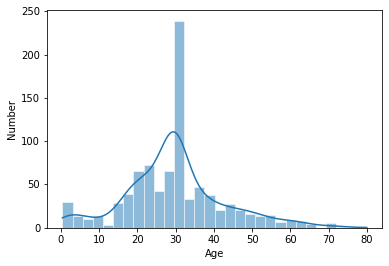

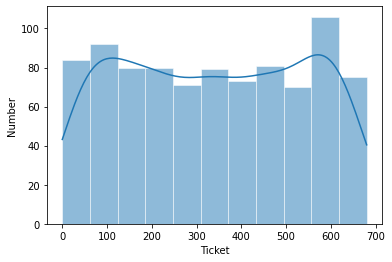

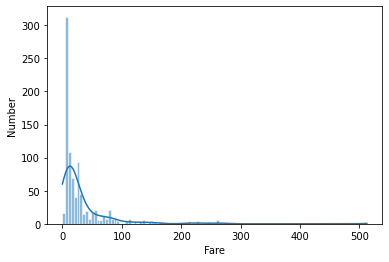

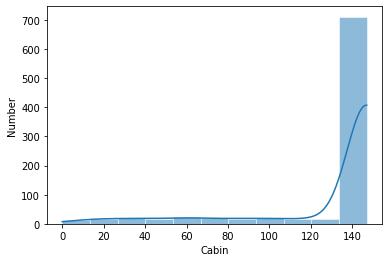

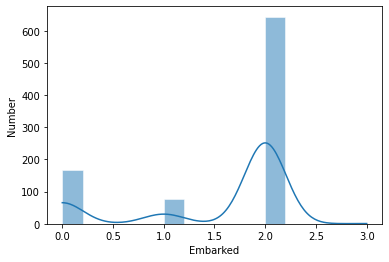

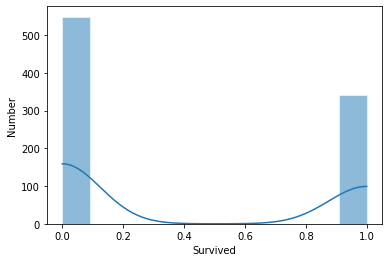

In [ ]:
import matplotlib.pyplot as plt
for i in df0.columns:
  sns.histplot(df0[i], linewidth=0.5, edgecolor="white",kde=True)
  plt.xlabel(i)
  plt.ylabel('Number')
  plt.show()

plt.show()

In [ ]:
l=int(len(df0)*0.8)
df0_train=df0[:l]
df0_test=df0[l:]

In [ ]:
df0=df0.drop(['Name','Cabin','PassengerId','Ticket'],axis=1)

## 2)
Gaussian Naive Bayes Classification works here well because the values to be predicted is continuous and follows normal distribution.

##3)

In [ ]:
df0_y_train = df0_train['Survived']
# print(df0_y_train)
df0_X_train = df0_train.drop(columns=['Survived'],axis=1)
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import CategorialNB
GNB = GaussianNB()
GNB.fit(df0_X_train, df0_y_train)


GaussianNB()

In [ ]:
df0_y_test = df0_test['Survived']
df0_X_test= df0_test.drop(columns=['Survived'],axis=1)

pred1 = GNB.predict(df0_X_test)


In [ ]:
print("Accuracy of BNB: ")
A = acc(df0_y_test,pred1)
print(A)

Accuracy of BNB: 
0.7430167597765364


### ROC Curve

(array([0.        , 0.14545455, 1.        ]), array([0.        , 0.56521739, 1.        ]), array([2, 1, 0]))


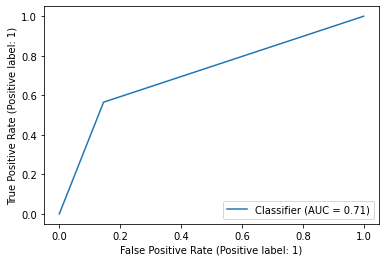

In [ ]:
x=ROC(df0_y_test,pred1)
print(x)

RocCurveDisplay.from_predictions(df0_y_test,pred1,sample_weight=None,drop_intermediate = False)

### AUC score

In [ ]:
from sklearn.metrics import roc_auc_score
AUC=roc_auc_score(df0_y_test,pred1)

AUC

0.7098814229249011

## 4) For Gaussian Naive Bayes Classifier

In [ ]:
X = df0.iloc[:,:-1]
y = df0.iloc[:,-1]
# print(X)
# print(y) 
 
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy = []
  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = GaussianNB()
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = acc(y_test,pred_values)
    accuracy.append(acc1)
    # RocCurveDisplay.from_predictions(y_test,pred_values)
avg_acc = sum(accuracy)/k
max_acc=max(accuracy)

print('Array of accuracies : ')
print(accuracy)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)



Array of accuracies : 
[0.7932960893854749, 0.7528089887640449, 0.7752808988764045, 0.7415730337078652, 0.7752808988764045]
Average ACC overall :
0.7676479819220388
Maximum ACC overall :
0.7932960893854749


In [ ]:
arr = GNB.predict_proba(X[["Pclass","Sex","Age","Fare","Embarked"]])
print("Top Class probabilities if each feature is: ")
print(arr)

Top Class probabilities if each feature is: 
[[0.97752015 0.02247985]
 [0.95367631 0.04632369]
 [0.97678554 0.02321446]
 ...
 [0.97735822 0.02264178]
 [0.91688735 0.08311265]
 [0.15408339 0.84591661]]


## 5)

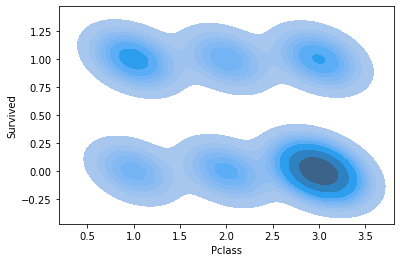

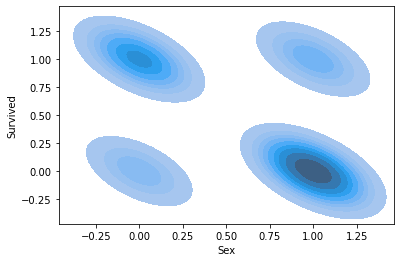

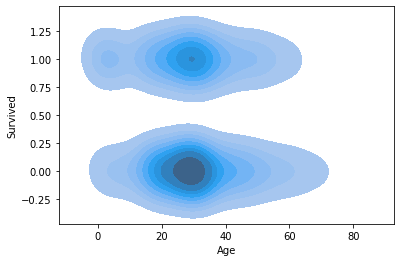

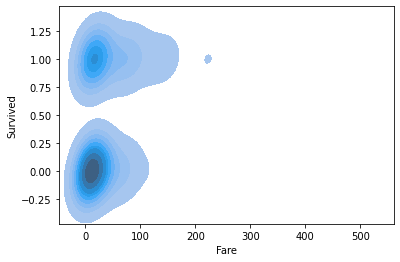

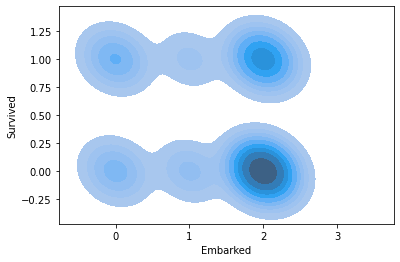

In [ ]:
for i in df0.columns:
  if(i != 'Survived'):
    sns.kdeplot(x=df0[i], y=df0['Survived'], shade=True)
    plt.show()

## 6) For Decision Tree Classifier

In [ ]:
X = df0.iloc[:,:-1]
y = df0.iloc[:,-1]
# print(X)
# print(y) 
 
k = 5



kf = KFold(n_splits=k,shuffle = True) 
accuracy = []
  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    Classifier = DecisionTreeClassifier()
    Classifier.fit(X_train,y_train)
    pred_values = Classifier.predict(X_test) 
    acc1 = acc(y_test,pred_values)
    accuracy.append(acc1)
    # RocCurveDisplay.from_predictions(y_test,pred_values)
avg_acc = sum(accuracy)/k
max_acc=max(accuracy)

print('Array of accuracies across different datasets: ')
print(accuracy)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies across different datasets: 
[0.776536312849162, 0.7921348314606742, 0.797752808988764, 0.7921348314606742, 0.7865168539325843]
Average ACC overall :
0.7890151277383718
Maximum ACC overall :
0.797752808988764


# Q2

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/PRML lab data /Lab 3/dataset (1).csv')
df1=shuffle(df1)
df1.head()
df1.rename(columns={"X0":"Area","X1":"Perimeter","X2":"Compactness","X3":"Length of kernel","X4":"Width of kernel","X5":"Asymmetry coefficient","X6":"Length of kernel groove"},inplace= True)
df1

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Y
180,11.41,12.95,0.8560,5.090,2.775,4.957,4.825,3
147,12.49,13.46,0.8658,5.267,2.967,4.421,5.002,3
174,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
34,15.05,14.68,0.8779,5.712,3.328,2.129,5.360,1
151,12.01,13.52,0.8249,5.405,2.776,6.992,5.270,3
...,...,...,...,...,...,...,...,...
173,11.40,13.08,0.8375,5.136,2.763,5.588,5.089,3
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
31,15.49,14.94,0.8724,5.757,3.371,3.412,5.228,1
13,13.78,14.06,0.8759,5.479,3.156,3.136,4.872,1


## 1)

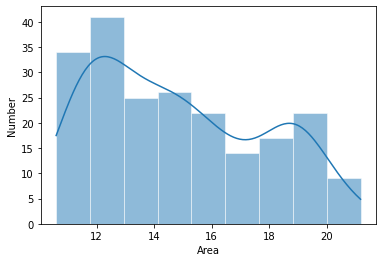

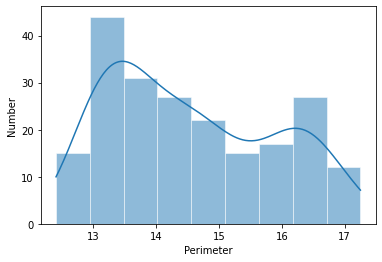

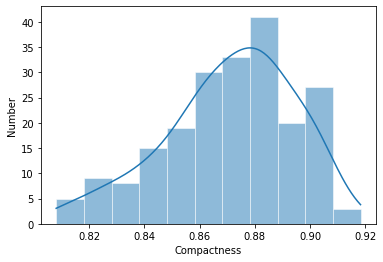

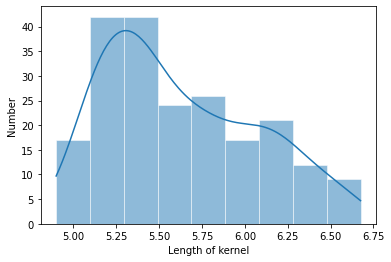

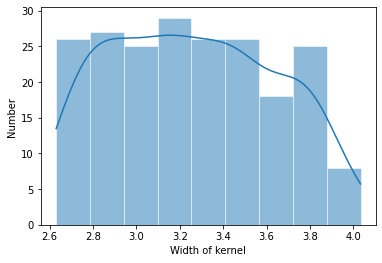

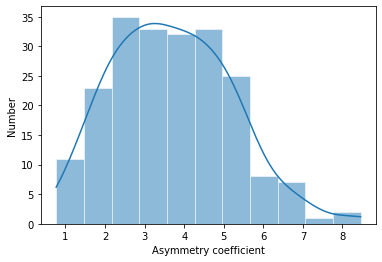

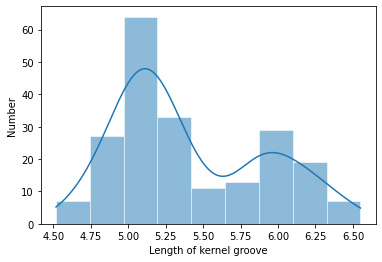

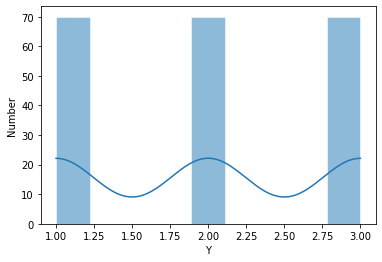

In [ ]:

for i in df1.columns:
  sns.histplot(df1[i], linewidth=0.5, edgecolor="white",kde=True)
  plt.xlabel(i)
  plt.ylabel('Number')
  plt.show()

## 2)

In [ ]:
class1=(df1[df1['Y']==1])
class2=(df1[df1['Y']==2])
class3=(df1[df1['Y']==3])

print("Prior probability of Class 1 is :")
pc1=len(class1)/len(df1)
print(pc1)

print("Prior probability of Class 2 is :")
pc2=len(class2)/len(df1)
print(pc2)

print("Prior probability of Class 3 is :")
pc3=len(class3)/len(df1)
print(pc3)

Prior probability of Class 1 is :
0.3333333333333333
Prior probability of Class 2 is :
0.3333333333333333
Prior probability of Class 3 is :
0.3333333333333333


## 3)

In [ ]:
for i in df1.columns:
  if(i != 'Y'):
    bin_width = (max(df1[i])-min(df1[i]))/10
    # print(max(df1[i]),min(df1[i]))
    # print(bin_width)
    l=[]
    for j in range(len(df1)):
      for k in range(0,11):
        if min(df1[i])+k*bin_width <= df1[i][j] and df1[i][j] < min(df1[i])+(k+1)*bin_width:
          l.append(k)                       

        # print(df1[i][j])  
    # print(l)      
    df1[i]=l
df1

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Y
180,4,5,5,4,4,1,3,3
147,4,4,6,3,5,0,2,3
174,3,3,8,2,5,2,1,3
34,3,3,7,2,5,1,1,1
151,5,5,8,4,6,0,3,3
...,...,...,...,...,...,...,...,...
173,1,1,6,1,2,3,1,3
5,0,0,3,1,1,4,2,1
31,2,2,7,1,4,9,2,1
13,1,1,3,1,1,3,2,1


## 4)


In [ ]:
df1_rmvY=df1.drop(columns=["Y"],axis=1)
l1=[]
for i in df1_rmvY.columns :
  print("for "+ i +" following are conditional probabilities: ")
  l2=[]
  for j in range(1,4):
    print("for class"+str(j))
    x = (df1[df1['Y']==j])
    l3=[]
    for k in range(0,11):
      y=len(x[x[i]==k])
      # print(x)
      c=(df1[df1['Y']==j])
      l3.append(y/len(c))
    print(l3)
    l2.append(l3)
  l1.append(l2)    
  print("\n")
# print(l1)  

for Area following are conditional probabilities: 
for class1
[0.17142857142857143, 0.17142857142857143, 0.12857142857142856, 0.08571428571428572, 0.1, 0.07142857142857142, 0.05714285714285714, 0.12857142857142856, 0.04285714285714286, 0.02857142857142857, 0.014285714285714285]
for class2
[0.14285714285714285, 0.15714285714285714, 0.08571428571428572, 0.17142857142857143, 0.1, 0.05714285714285714, 0.07142857142857142, 0.1, 0.07142857142857142, 0.04285714285714286, 0.0]
for class3
[0.14285714285714285, 0.15714285714285714, 0.1, 0.14285714285714285, 0.11428571428571428, 0.1, 0.014285714285714285, 0.14285714285714285, 0.07142857142857142, 0.014285714285714285, 0.0]


for Perimeter following are conditional probabilities: 
for class1
[0.07142857142857142, 0.2, 0.2, 0.04285714285714286, 0.11428571428571428, 0.08571428571428572, 0.02857142857142857, 0.11428571428571428, 0.08571428571428572, 0.04285714285714286, 0.014285714285714285]
for class2
[0.08571428571428572, 0.08571428571428572, 0.214

## 5)

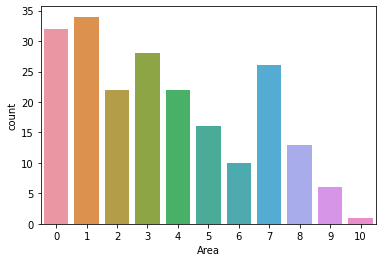

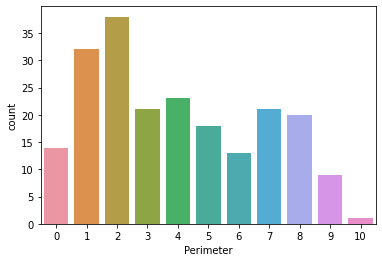

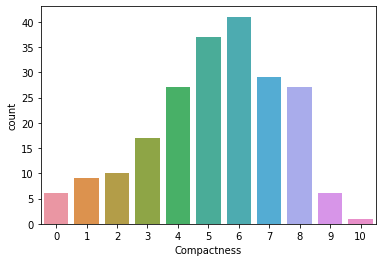

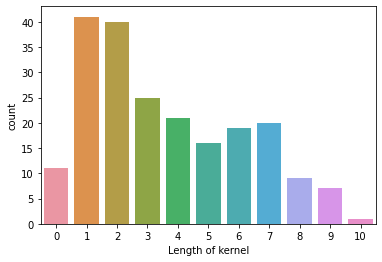

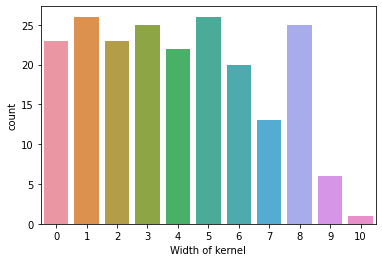

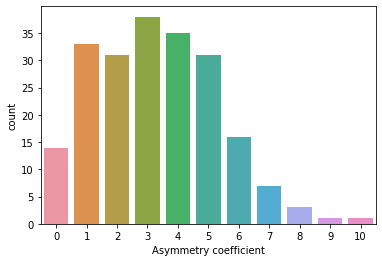

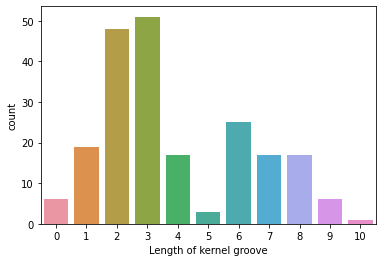

In [ ]:
for i in df1.columns:
  if (i != 'Y' and i != 'post_prob' ):
    sns.countplot(x=df1[i])
    plt.show()

## 6)

In [ ]:
l1=np.array(l1)
# print(l1)
def equivalent_prop(Cls,n):
  p=1
  m=[0,1,2,3,4,5,6]
  for i in range(len(m)):
    p=p*l1[m[i]][Cls][n[i]]
  return p
predicted=[]
posterior_prob=[]    
for i in range(len(df1)):
  n=df1.iloc[i].to_numpy()
  # print (n)
  c1 = pc1 * equivalent_prop(0,n)
  c2 = pc2 * equivalent_prop(1,n)
  c3 = pc3 * equivalent_prop(2,n)
  poc1=c1/(c1+c2+c3)
  poc2=c2/(c1+c2+c3)
  poc3=c3/(c1+c2+c3)


  if(c1 > c2 and c1 > c3):
    predicted.append(1)
    posterior_prob.append(poc1)
  if(c2 >= c1 and c2 > c3):
    predicted.append(2)
    posterior_prob.append(poc2)
  if(c3 > c1 and c3 >= c2):
    predicted.append(3)
    posterior_prob.append(poc3)

print(predicted)
print(posterior_prob)



[3, 2, 2, 3, 1, 2, 3, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 3, 1, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 2, 3, 2, 3, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 2, 2, 3, 3, 2, 1, 3, 2, 3, 2, 2, 3, 3, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 3, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1]
[0.7134512865972872, 0.522844542986868, 0.6781926360265585, 0.5945563348561869, 0.47581484340908314, 0.7190738960371916, 0.5269725819407779, 0.7190738960371916, 0.6512866529655252, 0.8215612786638081, 0.4677788981574846, 0.640489698417438, 0.4964539007092199, 0.6487629538123669, 0.6693743001995952, 0.6284458649620455, 1.0, 0.514386230529212, 0.911242603550296, 0.5675

In [ ]:
df1['post_prob']=posterior_prob

In [ ]:
Acc = acc(df1['Y'],predicted)
print (Acc)

0.5523809523809524


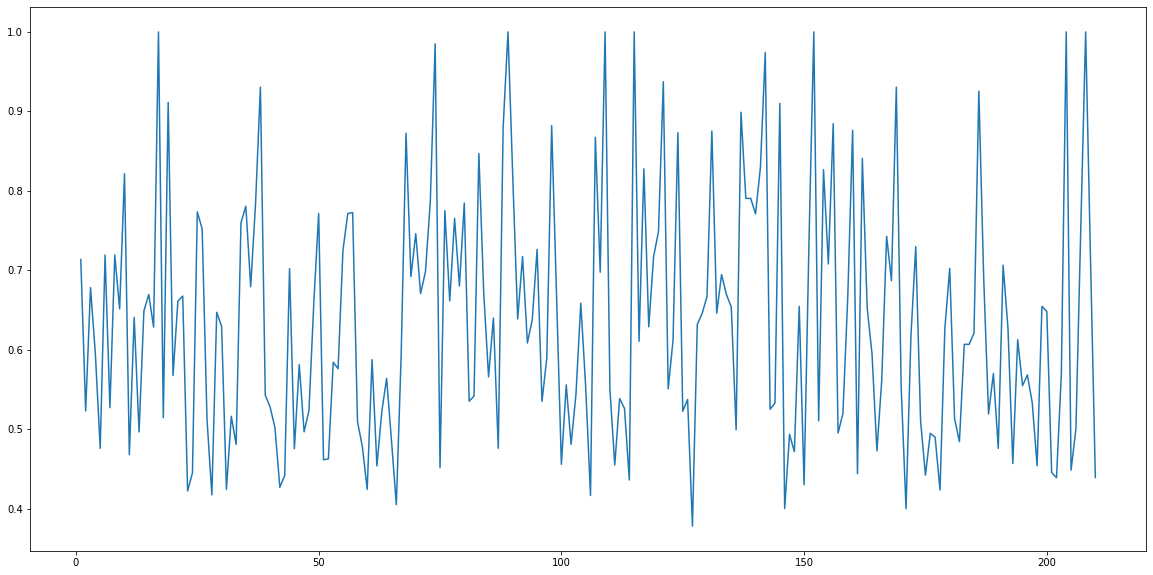

In [ ]:
lm=[]
for i in range(1,211):
  lm.append(i)
plt.figure(figsize=(20,10))  
plt.plot(lm,posterior_prob)

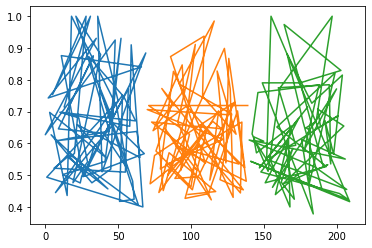

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Y,post_prob
180,4,5,5,4,4,1,3,3,0.713451
147,4,4,6,3,5,0,2,3,0.522845
174,3,3,8,2,5,2,1,3,0.678193
34,3,3,7,2,5,1,1,1,0.594556
151,5,5,8,4,6,0,3,3,0.475815
...,...,...,...,...,...,...,...,...,...
173,1,1,6,1,2,3,1,3,0.500430
5,0,0,3,1,1,4,2,1,0.753589
31,2,2,7,1,4,9,2,1,1.000000
13,1,1,3,1,1,3,2,1,0.715076


In [ ]:

plt.plot(df1[df1["Y"] == 1]["post_prob"],label = "1")
plt.plot(df1[df1["Y"] == 2]["post_prob"],label = "2")
plt.plot(df1[df1["Y"] == 3]["post_prob"],label = "3")
plt.show()
df1